In [0]:
import numpy as np
import pandas as pd
import glob
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Ładowanie danych z plików


In [0]:
path = r'____________________' #WSTAWIĆ swoją
all_files = glob.glob(path + "/*.csv")


df_from_each_file = (pd.read_csv(f, sep = ",", header = None) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)
df = df.rename(columns={0: 'agentID', 1: 'state', 2:'time'})

### Dzielenie danych w zależności od typu zachowania

In [0]:
bins = np.arange(df.time.min()-1, df.time.max()+1, 7)
labels = list(range(bins.size-1)) 
df['day'] = pd.cut(df['time'], bins = bins, labels = labels)

In [0]:
grouped = df.groupby(df.state)
infected = grouped.get_group("INFECTED").reset_index(drop=True)
dead = grouped.get_group("DEAD").reset_index(drop=True)
cured = grouped.get_group("CURED").reset_index(drop=True)

In [0]:
infected=infected.groupby('day').count().reset_index()
infected['sum']= infected.agentID.cumsum()
dead=dead.groupby('day').count().reset_index()
dead['sum']= dead.agentID.cumsum()
cured=cured.groupby('day').count().reset_index()
cured['sum']= cured.agentID.cumsum()

### Zakażenie

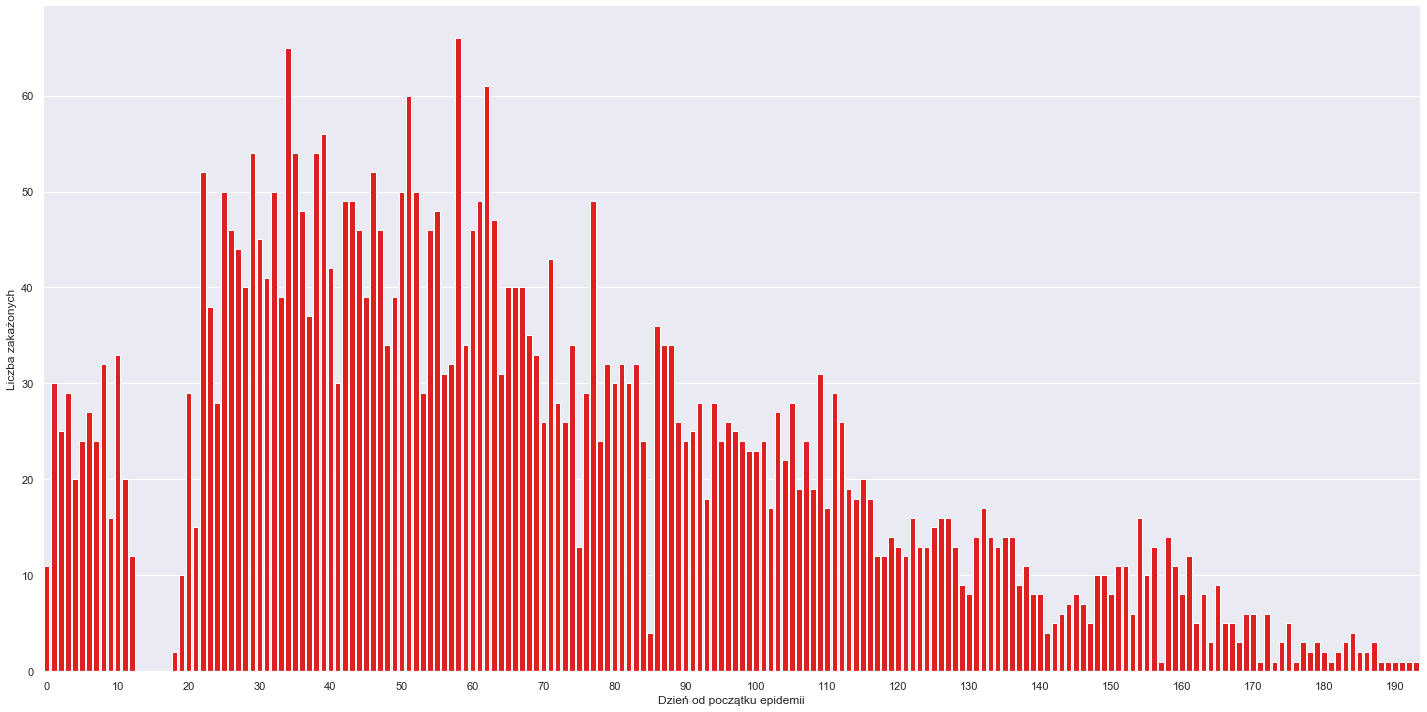

In [0]:
sns.catplot(x='day', y='agentID', data=infected,
            height=10, aspect=2, kind="bar", color = 'red')
plt.ylabel("Liczba zakażonych")
plt.xlabel("Tydzień od początku epidemii")
week = range(0,bins.size-1, 5)
plt.xticks(week,week);

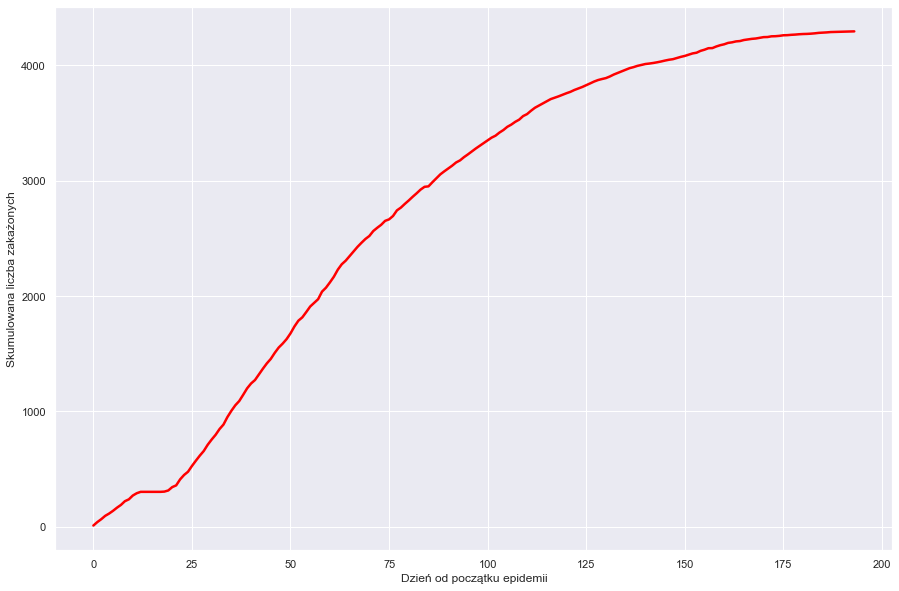

In [0]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.lineplot(ax=ax, x='day', y='sum', data=infected, 
                 linewidth=2.5, color = 'red')
plt.ylabel("Skumulowana liczba zakażonych")
plt.xlabel("Tydzień od początku epidemii");

### Śmerć

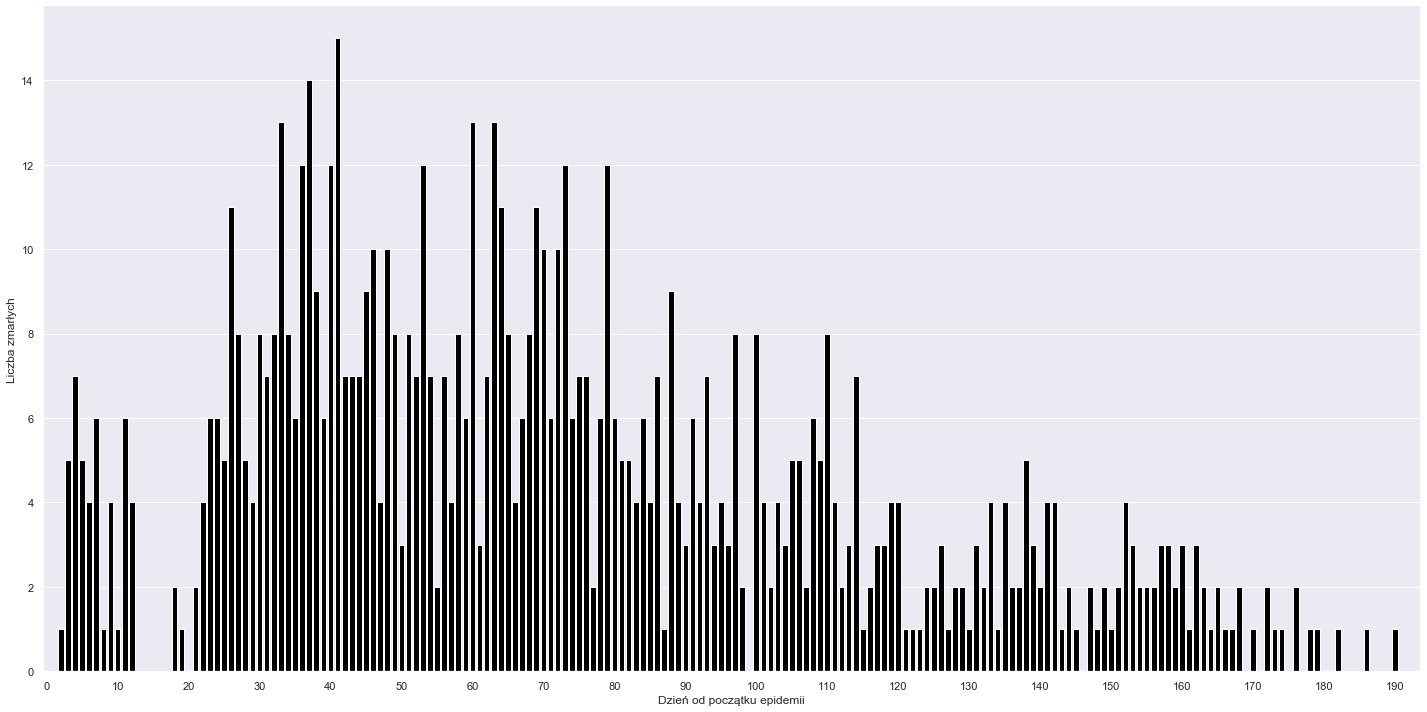

In [0]:
sns.catplot(x='day', y='agentID', data=dead,
            height=10, aspect=2, kind="bar", color = 'black')
plt.ylabel("Liczba zmarłych")
plt.xlabel("Tydzień od początku epidemii")
week = range(0,bins.size-1, 5)
plt.xticks(week,week);

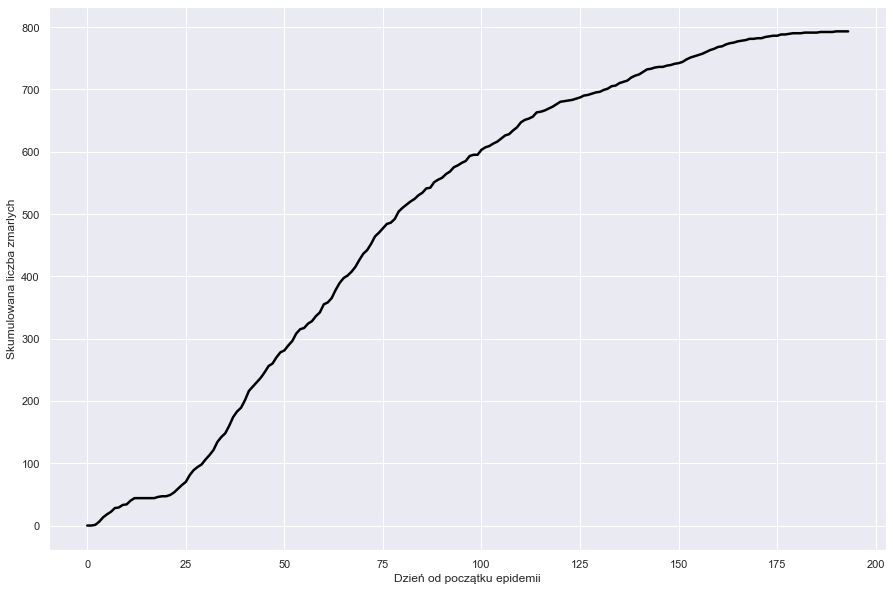

In [0]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.lineplot(ax=ax, x='day', y='sum', data=dead, 
                 linewidth=2.5, color = 'black')
plt.ylabel("Skumulowana liczba zmarlych")
plt.xlabel("Tydzień od początku epidemii");

### Wyzdroienie

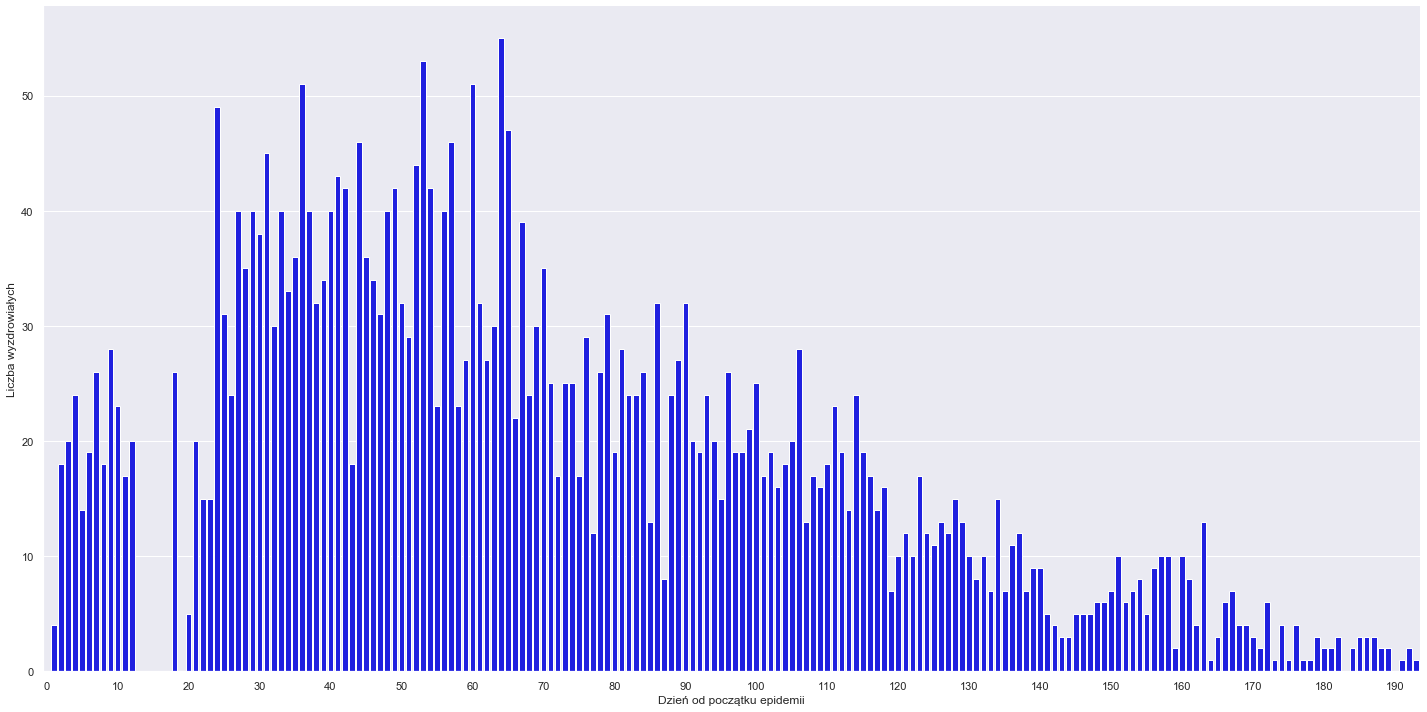

In [0]:
sns.catplot(x='day', y='agentID', data=cured,
            height=10, aspect=2, kind="bar", color = 'blue')
plt.ylabel("Liczba wyzdrowiałych")
plt.xlabel("Tydzień od początku epidemii")
week = range(0,bins.size-1, 5)
plt.xticks(week,week);

AttributeError: 'AxesSubplot' object has no attribute 'tight_layout'

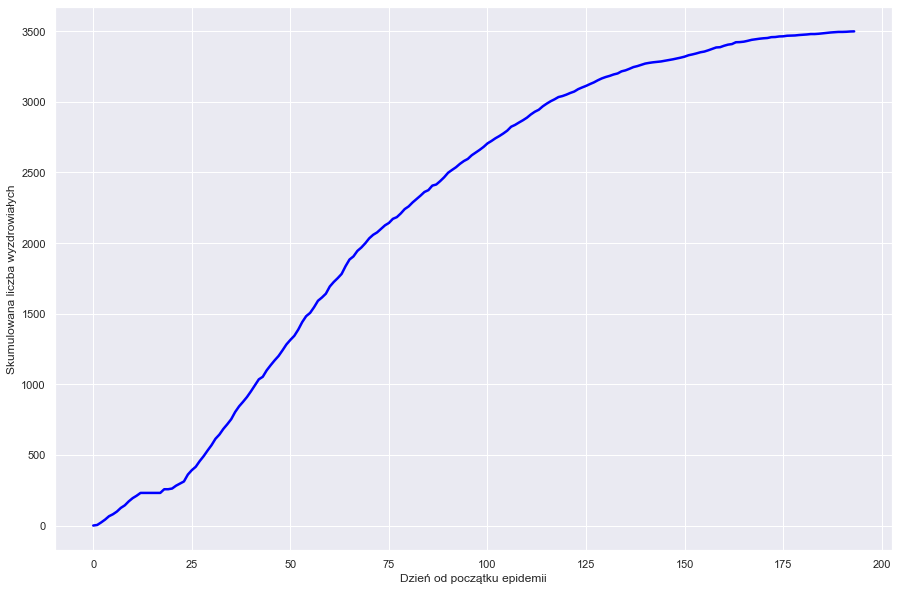

In [0]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.lineplot(ax=ax, x='day', y='sum', data=cured, 
                 linewidth=2.5, color = 'blue')
plt.ylabel("Skumulowana liczba wyzdrowiałych")
plt.xlabel("Tydzień od początku epidemii");
plt.savefig('cured_cum.png')

### Wykresy wspólne

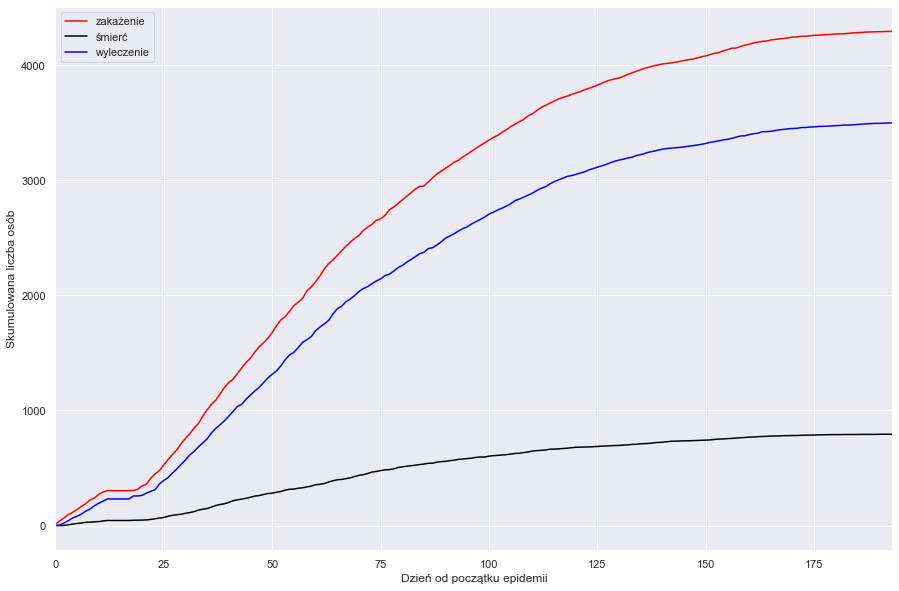

In [0]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
infected.plot(ax = ax, x='day', y='sum', color = 'red')
dead.plot(ax=ax, x='day', y='sum', color = 'black')
cured.plot(ax=ax, x='day', y='sum', color = 'blue')
plt.ylabel("Skumulowana liczba osób")
plt.xlabel("Tydzień od początku epidemii");
ax.legend(["zakażenie", "śmierć", "wyleczenie"]);
plt.savefig('all.png')